# TRABAJO FINAL MODULO 5
# NOMBRE : DIEGO ALONSO TELLO ALVA
## FUENTE : https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/ecom_data_transformed.csv')
df.head(10)

,gender,marital_status,prefered_order_cat_Fashion,prefered_order_cat_Grocery,prefered_order_cat_Laptop & Accessory,prefered_order_cat_Mobile,prefered_order_cat_Mobile Phone,preferred_login_device_Computer,preferred_login_device_Mobile Phone,preferred_login_device_Phone,...,warehouse_to_home,hour_spend_on_app,number_of_device_registered,satisfaction_score,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,day_since_last_order,cashback_amount
0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,6.0,3.0,3.0,2.0,9.0,1.0,11.0,1.0,5.0,160.0
1,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,8.0,3.0,4.0,3.0,7.0,1.0,15.0,0.0,0.0,121.0
2,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,30.0,2.0,4.0,3.0,6.0,1.0,14.0,0.0,3.0,120.0
3,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15.0,2.0,4.0,5.0,8.0,0.0,23.0,0.0,3.0,134.0
4,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,12.0,3.0,3.0,5.0,3.0,0.0,11.0,1.0,3.0,130.0
5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,11.0,2.0,3.0,2.0,4.0,0.0,14.0,0.0,0.0,121.0
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,6.0,3.0,3.0,2.0,3.0,1.0,16.0,2.0,0.0,123.0
7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,9.0,3.0,4.0,3.0,2.0,1.0,14.0,0.0,2.0,127.0
8,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,31.0,2.0,5.0,3.0,2.0,0.0,12.0,1.0,1.0,123.0
9,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,6.0,3.0,4.0,3.0,10.0,1.0,13.0,0.0,0.0,154.0


In [3]:
df.isnull().sum().sum()

np.int64(0)

In [4]:
corr_matrix = df.corr()
corr_churn = corr_matrix[['churn']].sort_values(by='churn',ascending=False)
corr_churn

,churn
churn,1.000000
complain,0.262246
marital_status,0.134560
satisfaction_score,0.131555
prefered_order_cat_Mobile Phone,0.122312
prefered_order_cat_Mobile,0.118015
number_of_device_registered,0.097851
warehouse_to_home,0.081101
preferred_payment_mode_COD,0.070926
preferred_login_device_Phone,0.068811


In [5]:
cols = corr_churn.index.tolist()
cols.remove('churn')
cols

['complain',
 'marital_status',
 'satisfaction_score',
 'prefered_order_cat_Mobile Phone',
 'prefered_order_cat_Mobile',
 'number_of_device_registered',
 'warehouse_to_home',
 'preferred_payment_mode_COD',
 'preferred_login_device_Phone',
 'city_tier',
 'preferred_payment_mode_E wallet',
 'number_of_address',
 'preferred_login_device_Computer',
 'preferred_payment_mode_CC',
 'preferred_payment_mode_Cash on Delivery',
 'gender',
 'order_amount_hike_fromlast_year',
 'hour_spend_on_app',
 'preferred_payment_mode_UPI',
 'prefered_order_cat_Fashion',
 'prefered_order_cat_Grocery',
 'coupon_used',
 'preferred_payment_mode_Debit Card',
 'preferred_payment_mode_Credit Card',
 'preferred_login_device_Mobile Phone',
 'cashback_amount',
 'prefered_order_cat_Laptop & Accessory',
 'day_since_last_order',
 'tenure']

In [6]:
X = df[cols].values
y = df['churn'].values.reshape(-1,1)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

# CREAMOS UN CODIGO PARA PODER EVALUAR VARIOS MODELOS

## 1 - IMPORTAMOS LIBRERIAS

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

## 2 - DEFINIMOS LOS MODELOS A EVALUAR

In [10]:
modelos_clasificacion = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVM (RBF)": SVC(kernel='rbf')
}

## 3 - CREAMOS FUNCIÓN DE EVALUACIÓN

In [11]:
def evaluar_clasificador(modelo, nombre):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'\n{nombre}:')
    print(f'Accuracy: {accuracy:.4f}')
    return accuracy

## 4 - ENTRENAMOS Y COMPARAMOS MODELOS

In [12]:
resultados_clasificacion = {}
for nombre,modelo in modelos_clasificacion.items():
    resultados_clasificacion[nombre] = evaluar_clasificador(modelo, nombre)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Regresión Logística:
Accuracy: 0.8591

Random Forest:
Accuracy: 0.9569


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting:
Accuracy: 0.9112


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



SVM (RBF):
Accuracy: 0.8934


In [13]:
mejor_modelo_clasificacion = max(resultados_clasificacion, key=resultados_clasificacion.get)
print(f'\nEl mejor modelo es: {mejor_modelo_clasificacion} con un Accuracy de {resultados_clasificacion[mejor_modelo_clasificacion]:.4f}')


El mejor modelo es: Random Forest con un Accuracy de 0.9569


## 5. GRAFICAMOS RESULTADOS

/tmp/ipython-input-219317408.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(resultados_clasificacion.keys()), y=list(resultados_clasificacion.values()), palette='mako')


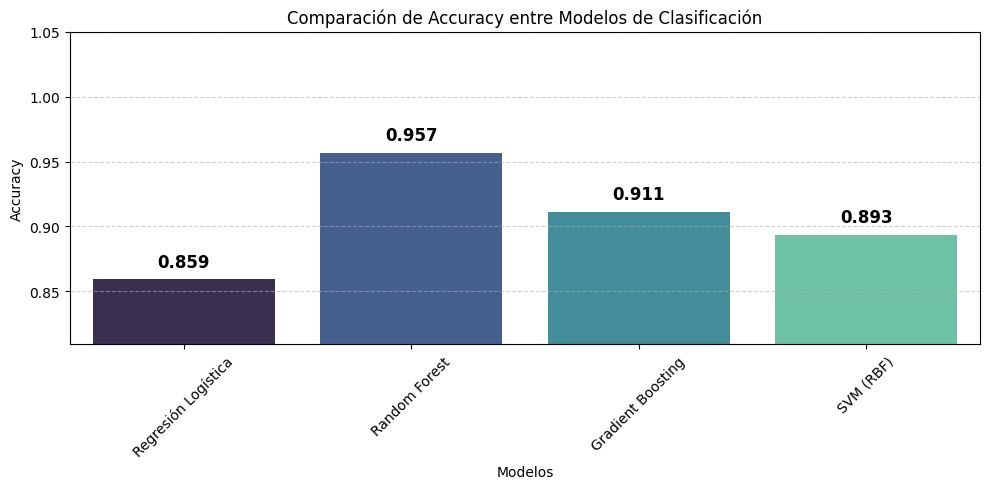

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Comparación del Accuracy entre modelos de clasificación
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(resultados_clasificacion.keys()), y=list(resultados_clasificacion.values()), palette='mako')

# Agregar etiquetas en cada barra
for index, value in enumerate(resultados_clasificacion.values()):
    ax.text(index, value + 0.01, f'{value:.3f}', ha='center', fontsize=12, fontweight='bold')

plt.ylim(min(resultados_clasificacion.values()) - 0.05, 1.05)
plt.xlabel('Modelos')
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy entre Modelos de Clasificación')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 6. CREAMOS UNA MATRIZ DE CONFUSIÓN

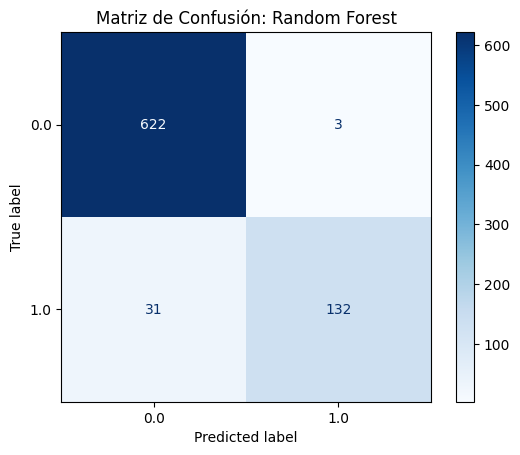

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluación del mejor modelo de clasificación
modelo_clasificacion_seleccionado = modelos_clasificacion[mejor_modelo_clasificacion]
y_pred_clasificacion = modelo_clasificacion_seleccionado.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_clasificacion)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=modelo_clasificacion_seleccionado.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f'Matriz de Confusión: {mejor_modelo_clasificacion}')
plt.show()